In [33]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Distribuciones discretas
uniform_disc = stats.randint(low=0, high=10) # k = 0, 1, ..., 9
bernoulli = stats.bernoulli(p=0.4)
binomial = stats.binom(n=50, p=0.4)
hypergeom = stats.hypergeom(M=20, n=7, N=12) 
poisson = stats.poisson(mu=5) # mu es lo mismo que lambda


# Distribuciones continuas
uniform_cont = stats.uniform(loc=0, scale=10) 
normal = stats.norm(loc=0.0, scale=1.0) 
exponental = stats.expon(loc=2.0) 

In [3]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2.5):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend(frameon=True)
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()

def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''Dibujar una PDF'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)
    
def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''Dibujar varias PDFs'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Distribución Acumulada')
    axs[1].set_ylabel('Densidad de Probabilidad')
    axs[0].legend()
    axs[1].legend()

# Ejercicio 1
### Considerar un dado de 20 caras para calcular las siguientes probabilidades:
- P(Obtener un número entre 6 y 9)
- P(Obtener al menos 12)
- P(Obtener 3 o menos)
- Graficar la Función de Densidad de Probabilidad

Probabilidad de obtener un número entre 6 y 9:  0.2
Probabilidad de obtener al menos 12:  0.45
Probabilidad de obtener 3 o menos:  0.15


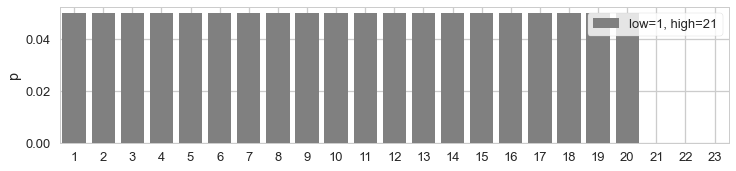

In [61]:
uniform_disc = stats.randint(low=1,high=21)

#1.1
p_between_6_an_9=uniform_disc.cdf(9)-uniform_disc.cdf(5)
print('Probabilidad de obtener un número entre 6 y 9: ', round(p_between_6_an_9,2))

#1.2
p_between_12_an_20=1-uniform_disc.cdf(11)
print('Probabilidad de obtener al menos 12: ', round(p_between_12_an_20,2))

#1.3
p_less_3=uniform_disc.cdf(3)
print('Probabilidad de obtener 3 o menos: ', round(p_less_3,2))

#1.4
draw_pmf_grid(stats.randint, 
              param_names=('low', 'high'), 
              param_values=[(1, 21)],
              xpts=[x+1 for x in range(23)])

# Ejercicio 2
### El apagador de una casa funciona 1 de 5 veces y al accionarlo 15 veces calcular la probabilidad de:
- P(Funcione 9 veces)
- P(Funcione menos de 4 veces)
- P(Funcione 3 o más veces)
- Graficar la Función de Densidad de Probabilidad


La probabilidad de que el apagador funcione 9 veces es:  0.000672
La probabilidad de que el apagador funciones menos de 4 veces (sin incluir el 4) es:  0.648162
La probabilidad de que el apagador funcione 3 o más veces es:  0.6019767907450877


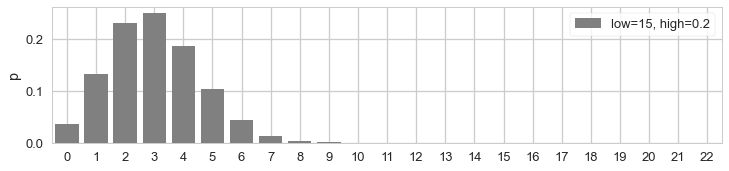

In [64]:
binomial = stats.binom(n=15, p=1/5)

works_9_times=round(binomial.pmf(9),6)
print('La probabilidad de que el apagador funcione 9 veces es: ', works_9_times)

works_less_4=round(binomial.cdf(3),6)
print('La probabilidad de que el apagador funciones menos de 4 veces (sin incluir el 4) es: ', works_less_4)

works_3_more=1-binomial.cdf(2)
print('La probabilidad de que el apagador funcione 3 o más veces es: ', works_3_more)

draw_pmf_grid(stats.binom, 
              param_names=('low', 'high'), 
              param_values=[(15, 1/5)],
              xpts=[x for x in range(23)])

# Ejercicio 3
### En una línea de producción se estrellan 3 vitrales por hora, clacular las probabilidades de:
- P(Estrellar un vitral por hora)
- P(Estrellar entre 4 y 7 por hora)
- P(Estrellar menos de 6 por hora)
- Graficar la Función de Densidad de Probabilidad


estrellar un vitral por hora:  0.14936120510359185
estrellar un vitral entre 4 y 7 veces:  0.3408636073614113
estrellar un vitral menos de 6 veces:  0.9160820579686966


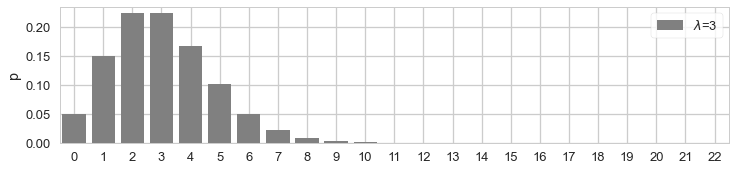

In [63]:
poisson = stats.poisson(mu=3) # mu es lo mismo que lambda

breaks_1=poisson.pmf(1)
print('estrellar un vitral por hora: ',breaks_1)
breaks4_7=poisson.cdf(7)-poisson.cdf(3)
print('estrellar un vitral entre 4 y 7 veces: ',breaks4_7)
break_less_6=poisson.cdf(5)
print('estrellar un vitral menos de 6 veces: ',break_less_6)
draw_pmf_grid(stats.poisson, 
              param_names=(r'$\lambda$',), 
              param_values=[(3,)],
              xpts=[x for x in range(23)])

# Ejercicio 4
### El documento sqft.csv, contiene el área en pies cuadrados (sqft) de un conjunto de hogares, con esta información calcular:
- P(Una casa posea 830 +/- 25 sqft)
- P(Una casa posea más de 3000 sqft)
- P(Una casa posea menos de 275 sqft)
- Graficar la Función de Densidad de Probabilidad


Probabilidad de que una casa posea 830 +/- 25 sqft:  0.3694
Probabilidad de que una casa posea más de 3000 sqft: 6.188705650167492e-05
Probabilidad de que una casa posea menos de 275 sqft:  0.0010030353476081443


array([[<AxesSubplot:title={'center':'sqft'}>]], dtype=object)

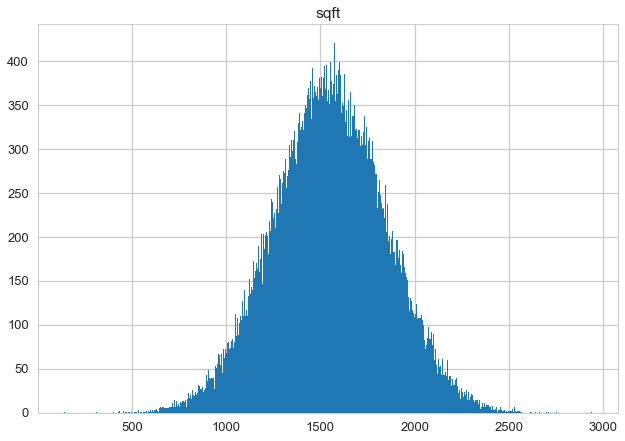

In [67]:
sqfts=pd.read_csv('data//sqft.csv')
#sqfts.hist(bins=100) dado el histograma podemos inferir que los pies cuadrados de los conjuntos de hogares siguen una distribucion normal, con las siguientes medias
mu=round(sqfts['sqft'].mean())
std=round(sqfts['sqft'].std())
norm=stats.norm(mu,std)
entre_830=norm.cdf(855)-norm.cdf(805)
print('Probabilidad de que una casa posea 830 +/- 25 sqft: ',round(entre_830,6)*100)
mas_3000=1-norm.cdf(3000)
print('Probabilidad de que una casa posea más de 3000 sqft:',mas_3000*100)
menos_275=norm.cdf(275)
print('Probabilidad de que una casa posea menos de 275 sqft: ',menos_275*100)

sqfts.hist(bins=1000)


# Ejercicio 5
#### Un mecanógrafo comete una media de 2 errores por página ¿Cuál es la probabilidad de que una página concreta no tenga errores?
- Pista: Se trata de la tasa de errores por página.


In [69]:
poisson=stats.poisson(2)

pag=poisson.pmf(0)
pag


0.1353352832366127

#### Los componentes se embalan en cajas de 20. La probabilidad de que un componente individual sea defectuoso es del 10%. Calcula las siguientes probabilidades:
- Que una caja contenga exactamente 2 componentes defectuosos
- Pista: 20 componentes independientes con un estado binario: normal o defectuoso.
- Qué una caja contenga máximo 2 componentes defectuosos
- Pista: Encuentra todas las posibilidades de que haya al menos 2 componentes defectuosos.


In [70]:
binomial=stats.binom(n=20,p=.1)

componentes_2=binomial.pmf(2)
print('Que una caja contenga exactamente 2 componentes defectuosos: ', componentes_2)

max_2_componentes=binomial.cdf(2)
print('Que una caja contenga máximo 2 componentes defectuosos: ', max_2_componentes)



Que una caja contenga exactamente 2 componentes defectuosos:  0.28517980706429846
Que una caja contenga máximo 2 componentes defectuosos:  0.6769268051894659


#### Los clientes llegan a un bar local a un ritmo de 30 por hora. ¿Cuál es la probabilidad de que el portero pueda tomarse un descanso de tres minutos para ir al baño sin perder al siguiente cliente?
- Pista 1: Reducir la tasa de persona/hora a persona/minuto
- Pista 2: La probabilidad del tiempo antes de que ocurra el evento sigue una distribución exponencial.

In [72]:
expo=stats.expon(0.5)
print('probabilidad de que el portero pueda tomarse un descanso de 3 minutos: ', 1-expo.cdf(3))

#se calcula la probabilidad de que NO lleguen clientes en un periodo de 3 minutos o que el siguiente cliente llegue despues del minuto 3: 
# 1-P(el siguiente cliente llegue en un periodo de 3 minutos)= 1-cdf(3)

probabilidad de que el portero pueda tomarse un descanso de 3 minutos:  0.08208499862389884


# Ejercicio 6
#### Tienes que encontrar a una persona alta, de al menos 1,80 metros, para que te ayude a alcanzar un tarro de galletas. El 8% de la población mide 1,80 m o más, y la gente pasa de media dos veces por minuto. Si esperas en la acera, ¿cuál es la probabilidad de que tengas que esperar más de diez minutos para conseguir unas galletas?
- Pista 1: Halla la tasa de número de personas altas/minuto.
- Pista 2: El problema se reduce a una función de distribución exponencial.


In [76]:
print('probabilidad de esperar mas de diez minutos para conseguir galletas: ', (1-stats.expon(2).cdf(10))*0.08)

probabilidad de esperar mas de diez minutos para conseguir galletas:  2.6837010232201307e-05


#### Un pasajero apresurado llegará varios minutos tarde a un vuelo programado para las 10 de la mañana a Nueva York. Sin embargo, es posible que llegue al vuelo, ya que el embarque siempre se permite hasta las 10:10 A.M., y a veces se permite el embarque hasta las 10:30 AM. Suponiendo que la hora de finalización del intervalo de embarque se distribuye uniformemente sobre los límites anteriores, encuentre la probabilidad de que el pasajero llegue a su vuelo, suponiendo que llega a la puerta de embarque a las 10:25.

In [78]:
uniforme=stats.randint(low=0, high=20)

print('Probabilidad de alcanzar el vuelo suponiendo que llega al embarque 10:25: ', uniforme.cdf(20)-uniforme.cdf(14))

#dado que que llega 10:25 el vuelo puede salir 10:25,26,27,28,29,30



Probabilidad de alcanzar el vuelo suponiendo que llega al embarque 10:25:  0.25


# Ejercicio 7
#### Tu gato empieza a pedir la cena a las 3:30 todos los días, y sospechas que maúlla a un ritmo fijo. Has observado que aproximadamente una quinta parte de las veces tu gato no maúlla hasta las 3:40, lo que te da 10 minutos inesperados de tranquilidad. ¿Cuál es la probabilidad de que tu gato te deje tranquilo durante 30 minutos?
- Pista : Primero encuentra el parámetro de la distribución, y luego utiliza el parámetro que has encontrado para calcular la probabilidad desconocida.



In [79]:
poisson=stats.poisson(1/5)
poisson.pmf(3)


0.0010916410041039767

#### De alguna manera, has acabado con dos tipos de tenedores. Están los tenedores buenos, que son grandes y sirven para un bocado sano, pero también están estos pequeños y finos que no entiendes muy bien para qué sirven, probablemente deberías deshacerte de ellos. Necesitas dos tenedores para ti y tu pareja, y coge un puñado de 5. Si hay 14 tenedores en el cajón, de los cuales la mitad son del tipo bueno, ¿cuál es la probabilidad de que tengas al menos los dos tenedores buenos que necesitas?
- Pista 1: Este es un problema de distribución hipogeométrica.
- Pista 2: Descomponga todas las posibilidades de tener al menos dos tenedores buenos, es decir, 2 tenedores buenos, 3, 4 y 5.

In [115]:
hypergeom = stats.nhypergeom(M=14, n=7, r=5) 

print(hypergeom.cdf(5)-hypergeom.cdf(1))

hypergeom.pmf(2)+hypergeom.pmf(3)+hypergeom.pmf(4)+hypergeom.pmf(5)

0.6689976689976695


0.6689976689976695

# Ejercicio 8
#### De los alumnos de una clase, el 60% son genios, el 70% aman el chocolate y el 40% entran en ambas categorías. Determina la probabilidad de que un alumno seleccionado al azar no sea ni un genio ni un amante del chocolate.
- Pista: Es de tipo conjunto



In [84]:
G=.6
C=.7
GnC=.4

print('probabilidad de que no es genio ni ama el chocolate: ', 1-(.6+.7-.4))


probabilidad de que no es genio ni ama el chocolate:  0.1000000000000002


#### Se lanza tres veces, de forma independiente, un dado justo de 6 caras. ¿Qué es más probable: una suma de 11 o una suma de 12?


In [109]:
from math import factorial

#P de que la suma sea 12: 6 + 5 + 1 ; 6 + 4 + 2; 5 + 4 + 3; -> cada opcion tiene 6 formas de repetirse 3!       6 + 3 + 3; 5 + 5 + 2;   cada opcion tiene 3 formas de repetirse 3!/2

#                         4 + 4 + 4; -> solo tiene una opción de repetirse total = 25 
#P de que la suma sea 11: 6 + 4 + 1 ; 6 + 3 + 2; 5 + 4 + 2; -> cada opcion tiene 6 formas de repetirse 3!       5 + 5 + 1; 5 + 3 + 3; 4 + 4 + 3;  cada opcion tiene 3 formas de repetirse 3!/2 total = 27            

omega= 6**3
P_suma_12= ((3*(factorial(3))) + 2*(factorial(2)/2) + 1*(factorial(3)/6))/omega
P_suma_11= (3*(factorial(3)) + 3*(factorial(2)/2))/omega

if P_suma_12>P_suma_11:
    print('la probabilidad de que la suma sea 12 es mayor a la probabilidad de que la suma sea 11')
else:
    print('la probabilidad de que la suma sea 11 es mayor a la probabilidad de que la suma sea 12')



la probabilidad de que la suma sea 11 es mayor a la probabilidad de que la suma sea 12


#### Hay que repartir 90 alumnos al azar en 3 clases de igual tamaño. Joe y Jane son dos de los estudiantes. ¿Cuál es la probabilidad de que acaben en la misma clase?


In [110]:
#hay 9 configuraciones en las que Joe y Jane pueden quedar en los diferentes grupos: 3^3  ya que tanto joel como jane tiene la misma posibilidad de ir a cualquier grupo

omega=9
grupoos_juntos=3

Probabilidad_mismaclase=3/9
Probabilidad_mismaclase

0.3333333333333333

#### Se reparte una baraja bien barajada de 52 cartas a 4 jugadores. Encuentra la probabilidad de que cada uno de los jugadores obtenga un as.
- Pista: Los últimos tres son de tipo combinatoria

In [145]:
def combinaciones(m,n):
    from math import factorial
    return(int(factorial(m)/(factorial(m-n)*factorial(n))))

omega= combinaciones(52,4)
As= 13**4

print('La probabilidad de que a cada jugador le salga un as es de : ',As/omega)




La probabilidad de que a cada jugador le salga un as es de :  0.10549819927971188
